<a href="https://colab.research.google.com/github/ivan1melnyk/API-of-PrivatBank/blob/main/a2_BiologicalNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biological Neuron


*This is the first version of our tutorial for the lecture on the biological neuron. We tried to make it more closely connected to the lecture to help you preparing for the exam. We are very happy about feedback as well as bug reports.*


## Tilting Bucket Model


 The tilting bucket model is a simplified way to conceptualize neuronal firing.  Imagine a bucket
 that gradually fills with water (representing synaptic input).  As the water level rises, it pushes against a tilting mechanism. When the water level reaches a certain threshold,
 the bucket tips, releasing the water (representing an action potential) and the process
 starts again.  The rate at which the bucket fills represents the firing rate of the neuron.

### Key features:
*  **Accumulation:** Incoming synaptic input increases the "water level" (internal state).
*  **Threshold:** A critical level must be reached to trigger an action potential (bucket tipping).
*  **Reset:** After firing, the "water level" resets (bucket empties) and starts accumulating again.
*  **Leak:** In more complex models, a leak" might be added to represent the neuron's tendency to           return to its resting state, even without firing.

 ### Limitations:
* It's an oversimplification of the complex biophysical processes in a neuron.
* It doesn't capture the diverse types of ion channels or the intricate interactions between them.

 Despite its limitations, it provides a useful intuitive framework for understanding how synaptic
 input translates into action potential output.  It serves as a good starting point before exploring more sophisticated neuronal models.



* Modify the model to include adaptation:  the threshold increases slightly after a spike,     mimicking neuronal refractoriness.#

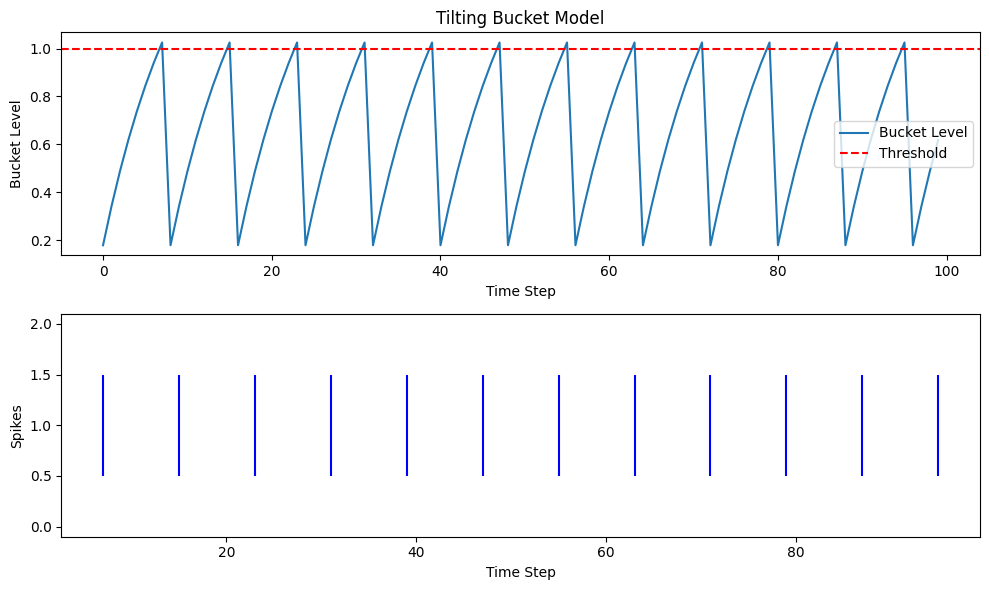

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
threshold = 1.0  # Threshold for neuronal firing
leak_rate = 0.1  # Rate at which the bucket leaks
input_current = 0.2  # Constant input current
time_steps = 100


def tilting_bucket_model(threshold, leak_rate, input_current, time_steps):
    """Simulates the tilting bucket model of neuronal firing."""

    bucket_level = 0.0
    spikes = []  # Store spike times
    bucket_levels = []  # Store bucket levels over time


    for t in range(time_steps):
        bucket_level += input_current  # Add input current
        bucket_level -= leak_rate * bucket_level  # Apply leak
        bucket_levels.append(bucket_level) # Append bucket level

        if bucket_level >= threshold:
            spikes.append(t)
            bucket_level = 0.0  # Reset the bucket

    return spikes, bucket_levels


def visualize_simulation(spikes, bucket_levels, threshold, time_steps):
    """Visualizes the results of the tilting bucket model simulation."""
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(range(time_steps), bucket_levels, label='Bucket Level')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.xlabel('Time Step')
    plt.ylabel('Bucket Level')
    plt.title('Tilting Bucket Model')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.eventplot(spikes, colors='b')  # Show spikes as vertical lines
    plt.xlabel('Time Step')
    plt.ylabel('Spikes')

    plt.tight_layout()
    plt.show()

# Run the simulation
spikes, bucket_levels = tilting_bucket_model(threshold, leak_rate, input_current, time_steps)

# Visualize the results
visualize_simulation(spikes, bucket_levels, threshold, time_steps)




##  1. Parameter Exploration:

Vary the input current, threshold, and leak rate systematically
     and visualize and describe their impact on the firing rate and pattern of spikes.

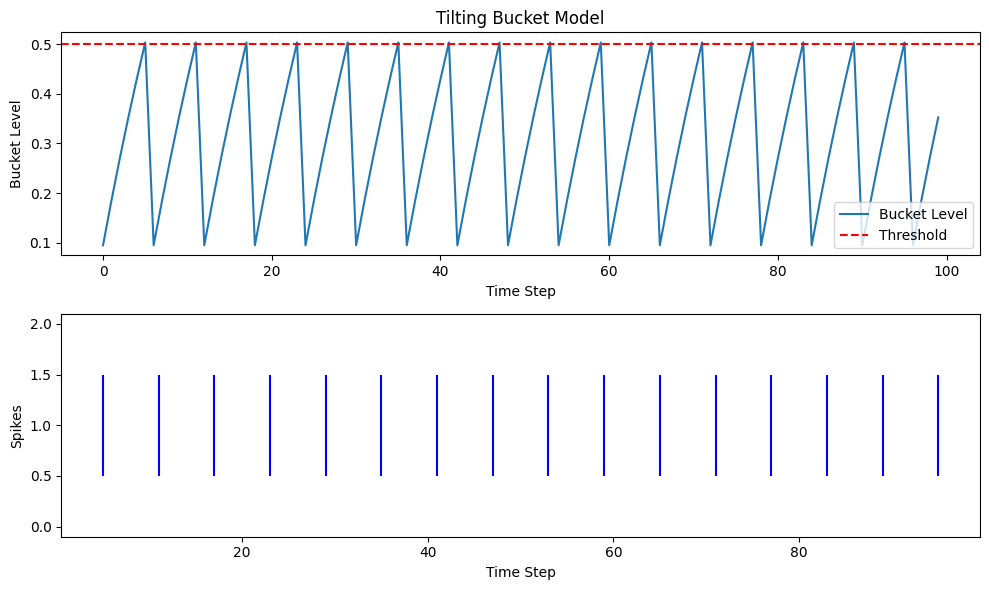

Input current: 0.1, Threshold: 0.5, Leak rate: 0.05


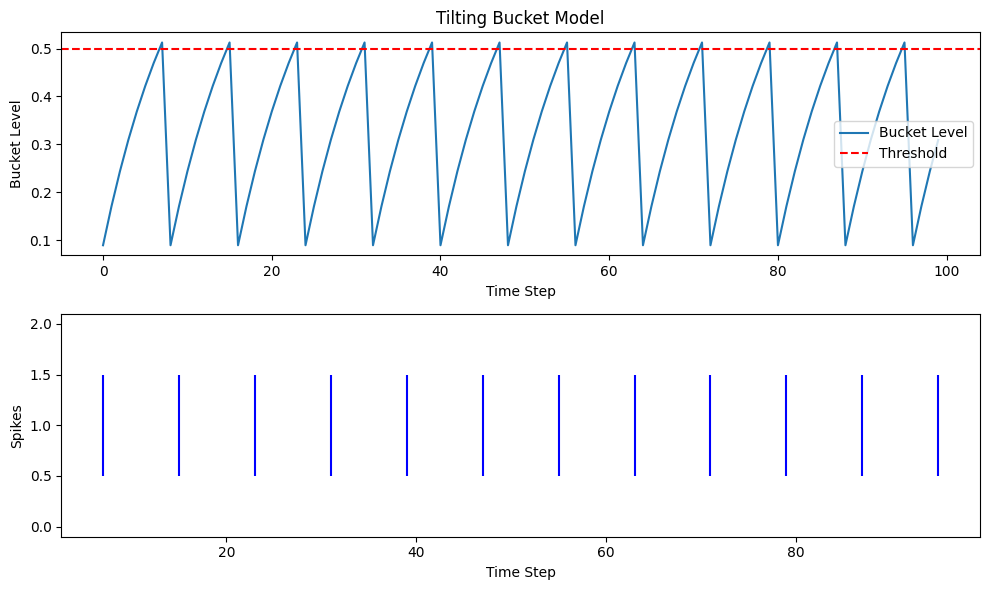

Input current: 0.1, Threshold: 0.5, Leak rate: 0.1


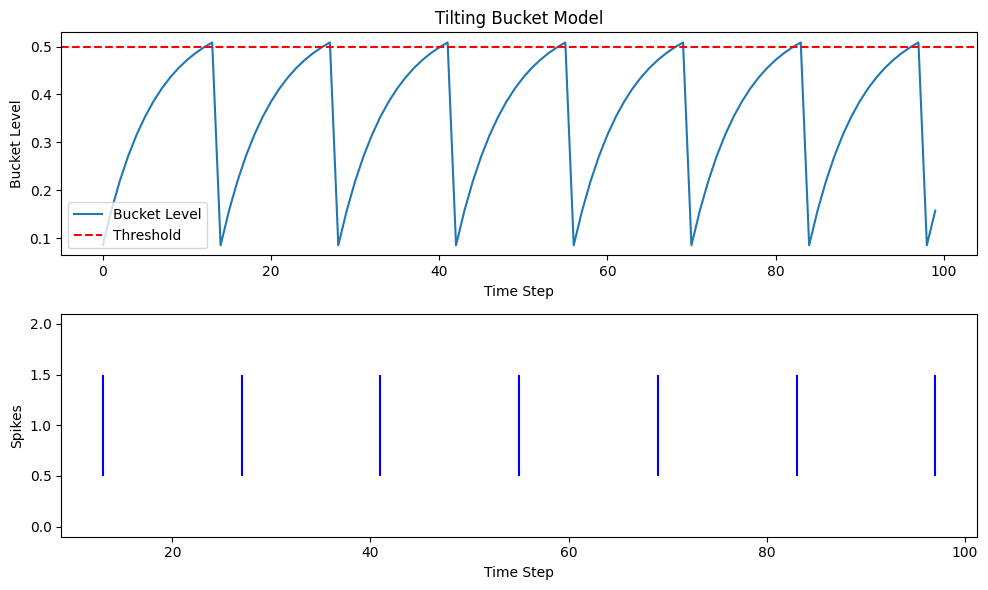

Input current: 0.1, Threshold: 0.5, Leak rate: 0.15


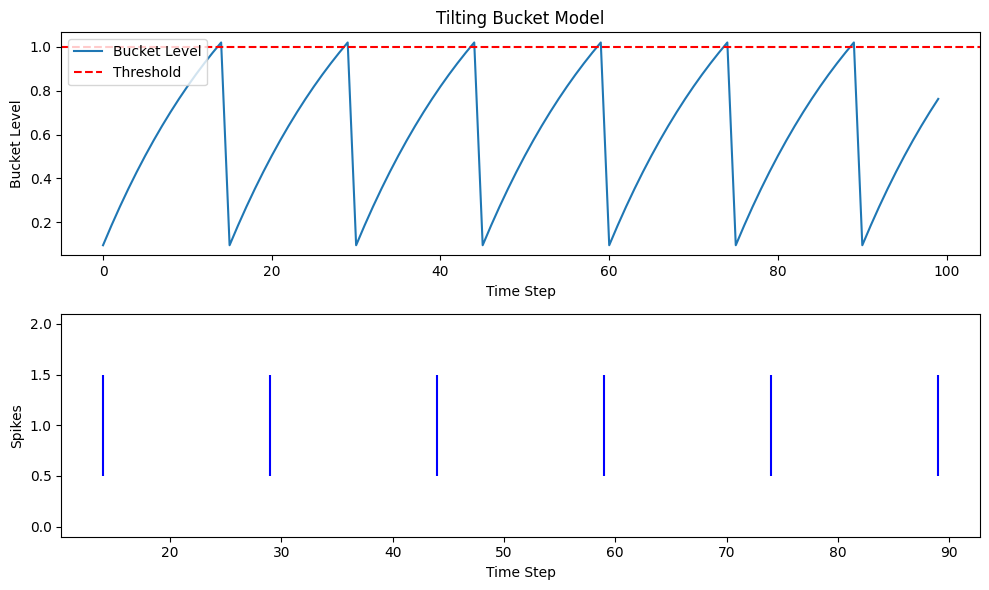

Input current: 0.1, Threshold: 1.0, Leak rate: 0.05


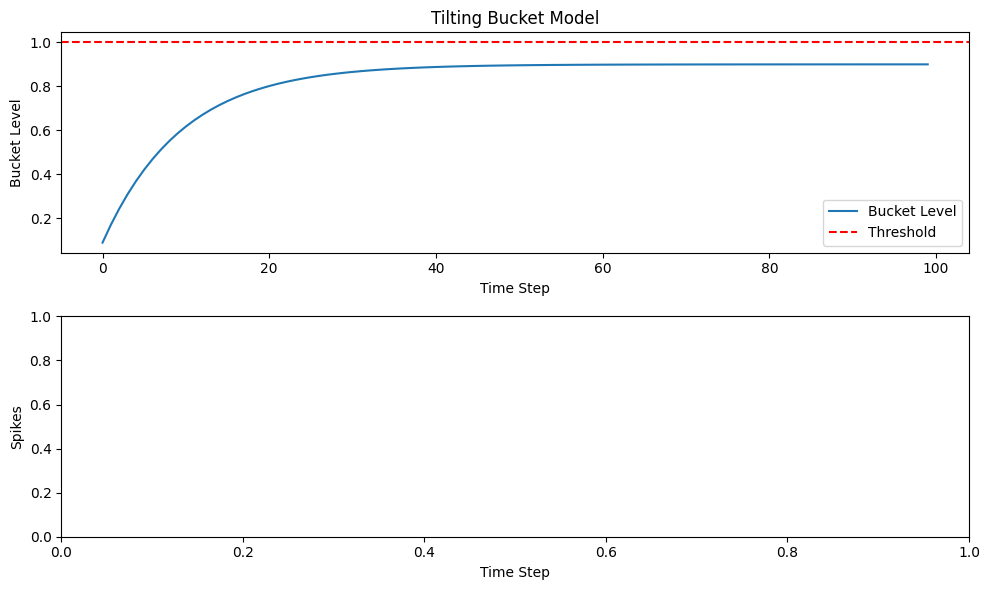

Input current: 0.1, Threshold: 1.0, Leak rate: 0.1


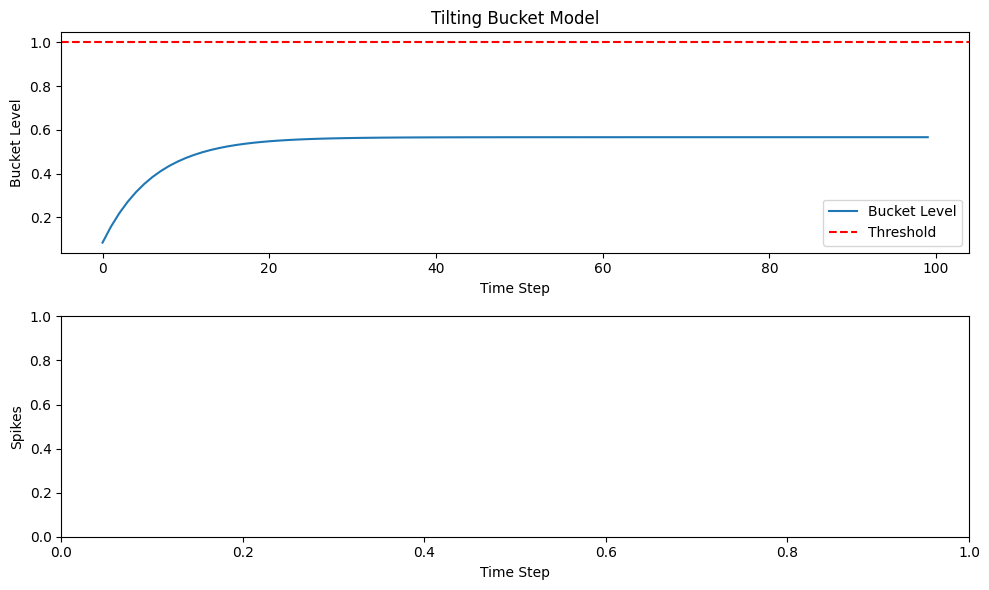

Input current: 0.1, Threshold: 1.0, Leak rate: 0.15


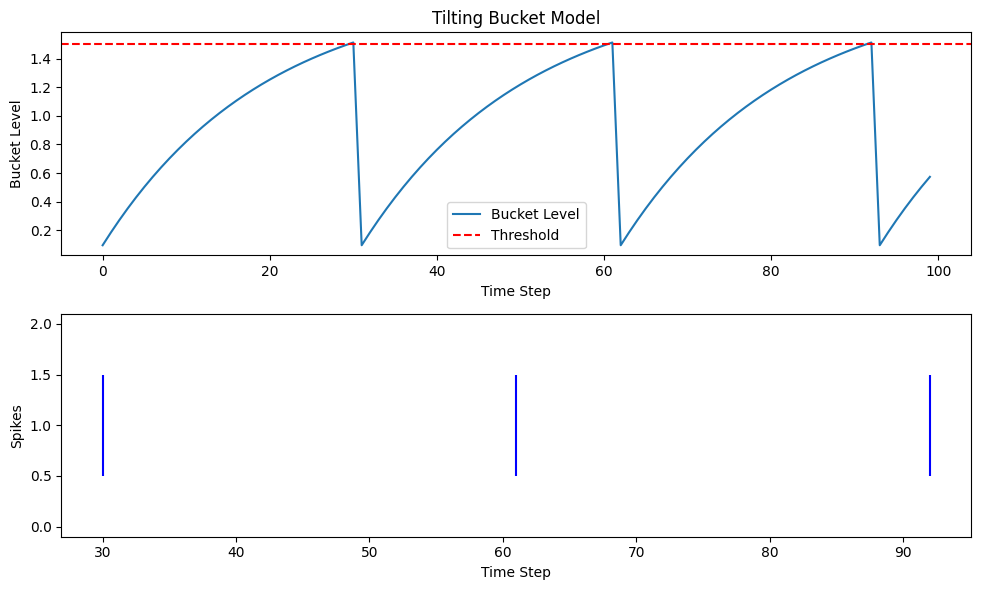

Input current: 0.1, Threshold: 1.5, Leak rate: 0.05


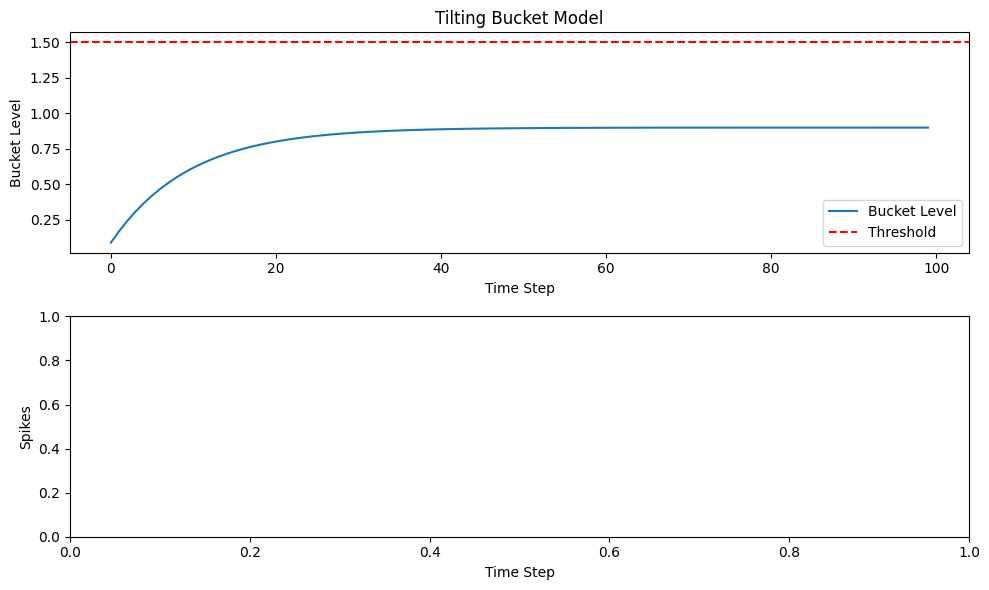

Input current: 0.1, Threshold: 1.5, Leak rate: 0.1


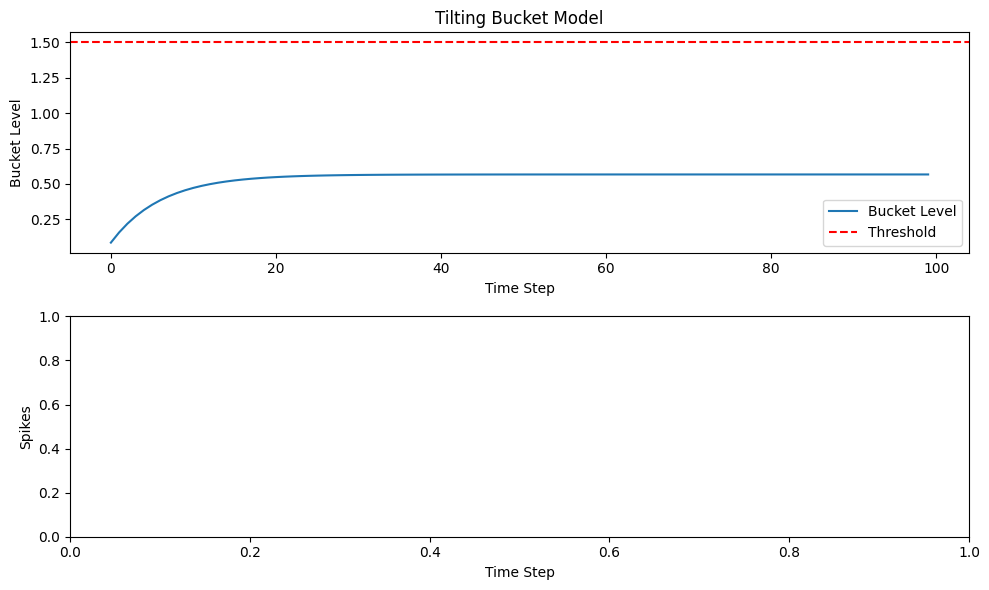

Input current: 0.1, Threshold: 1.5, Leak rate: 0.15


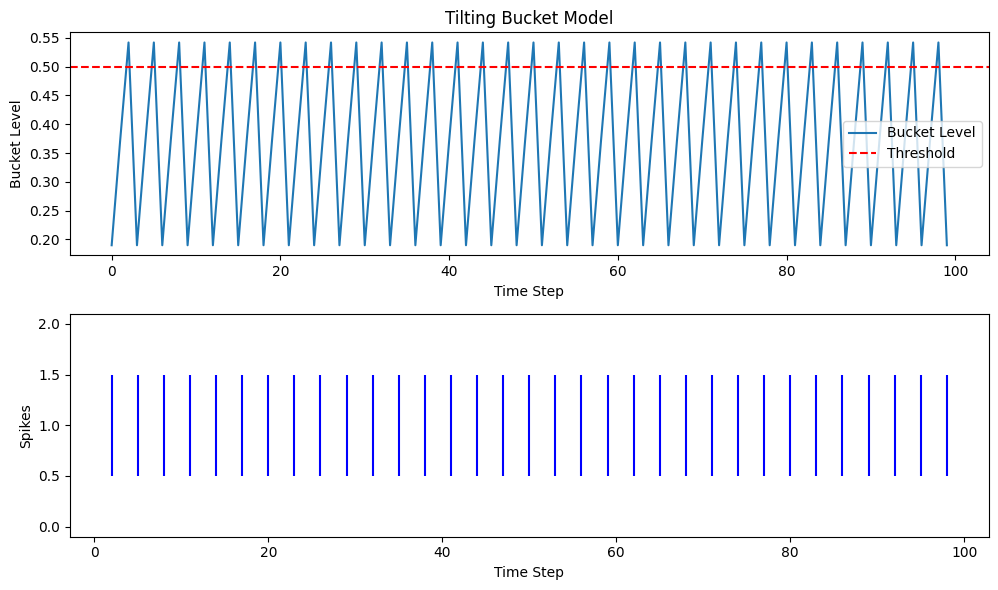

Input current: 0.2, Threshold: 0.5, Leak rate: 0.05


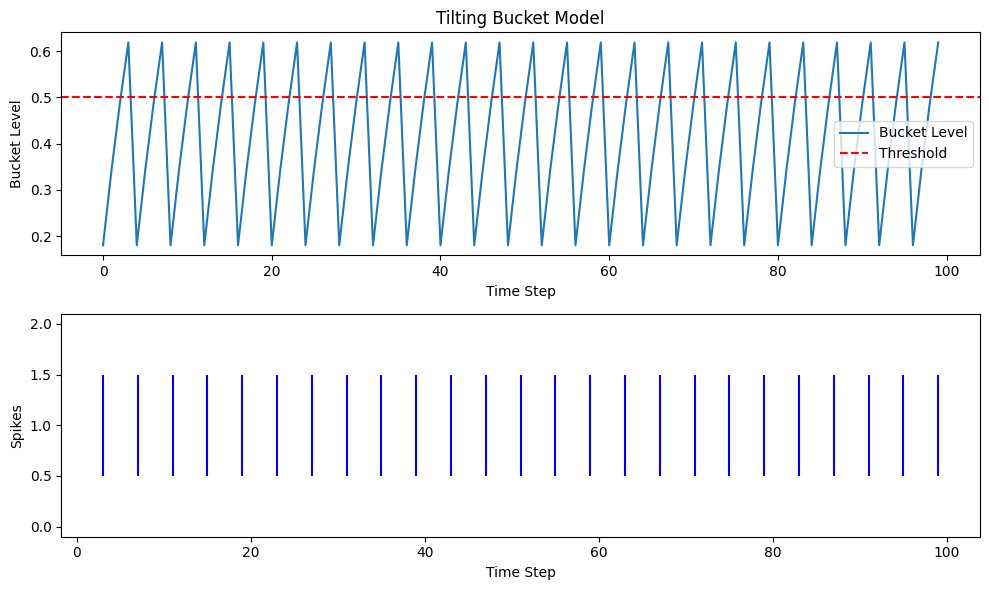

Input current: 0.2, Threshold: 0.5, Leak rate: 0.1


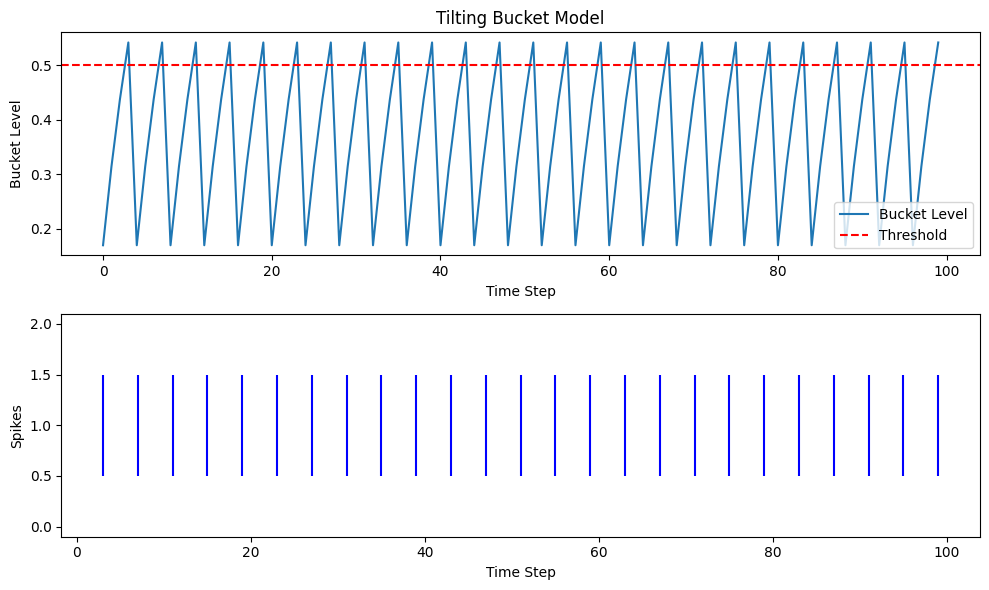

Input current: 0.2, Threshold: 0.5, Leak rate: 0.15


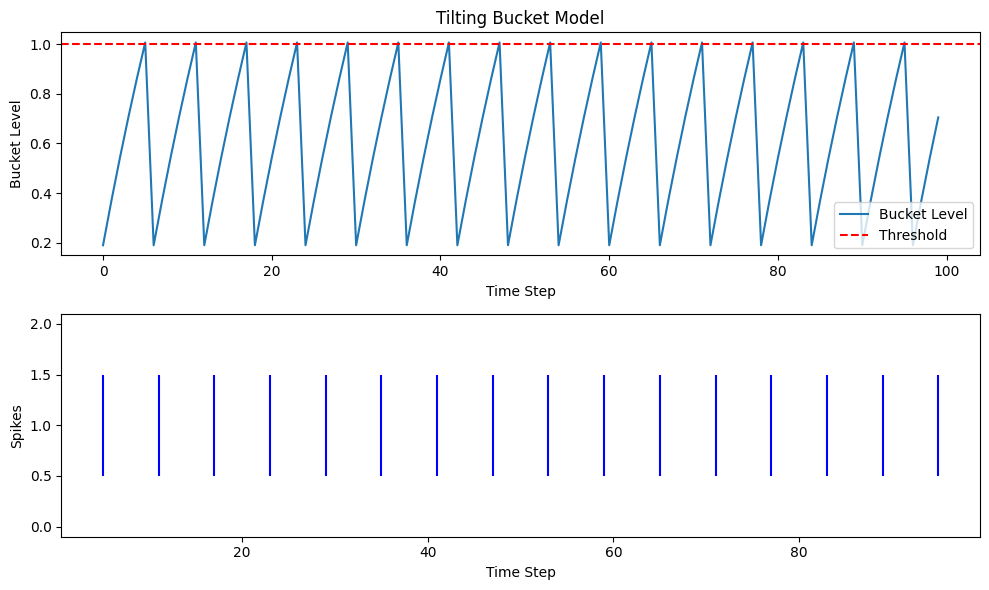

Input current: 0.2, Threshold: 1.0, Leak rate: 0.05


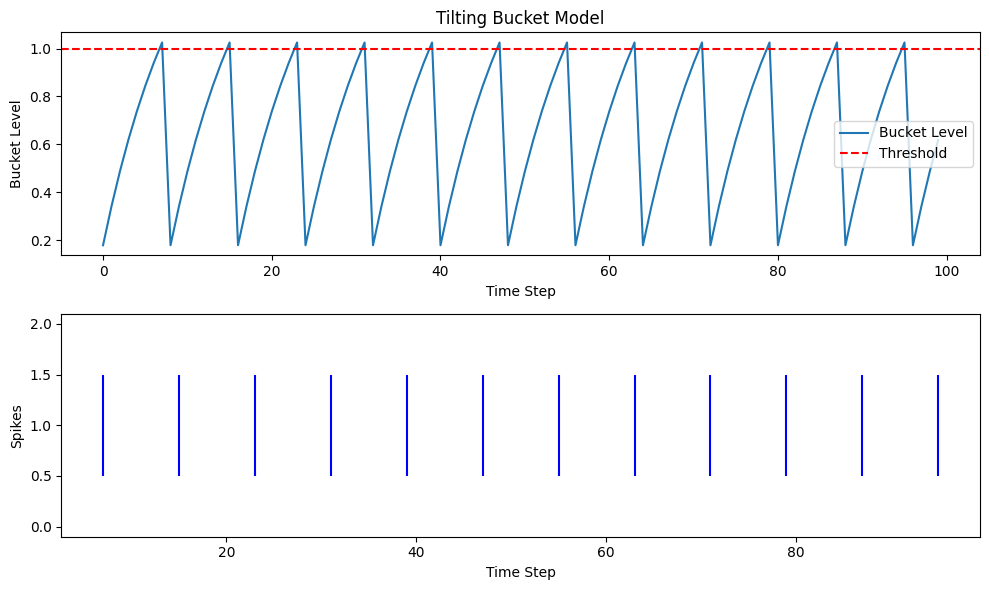

Input current: 0.2, Threshold: 1.0, Leak rate: 0.1


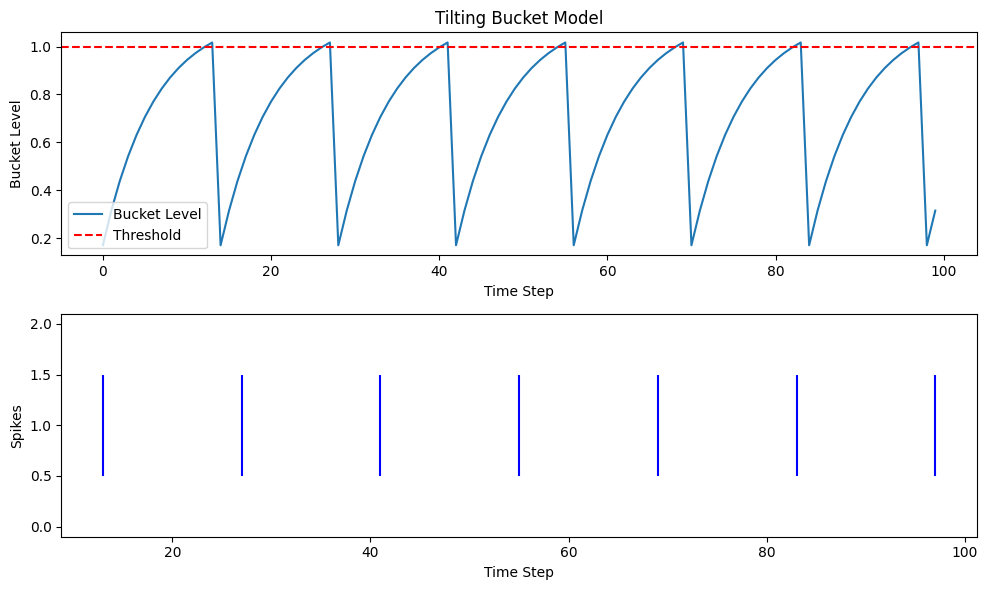

Input current: 0.2, Threshold: 1.0, Leak rate: 0.15


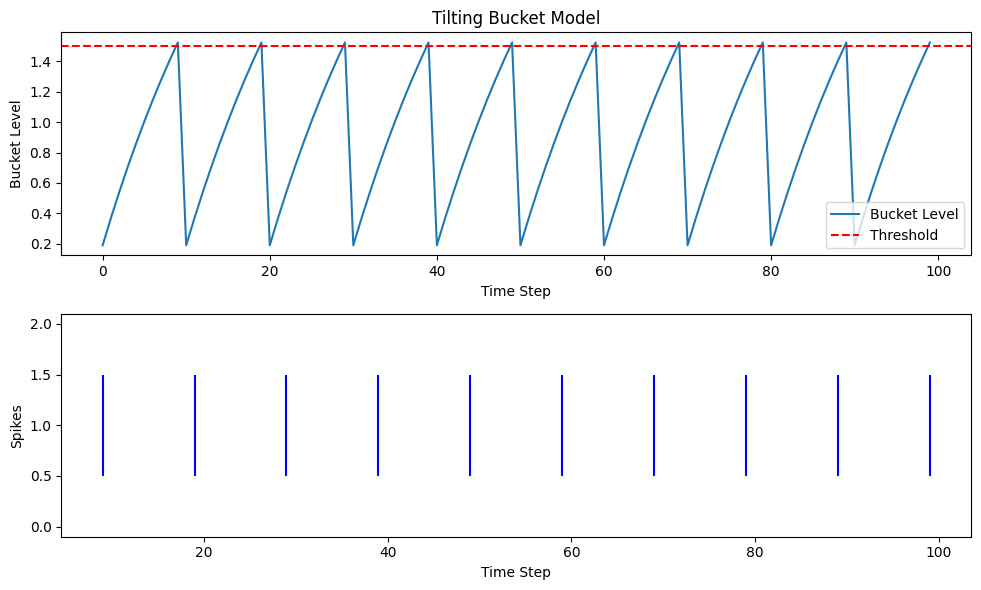

Input current: 0.2, Threshold: 1.5, Leak rate: 0.05


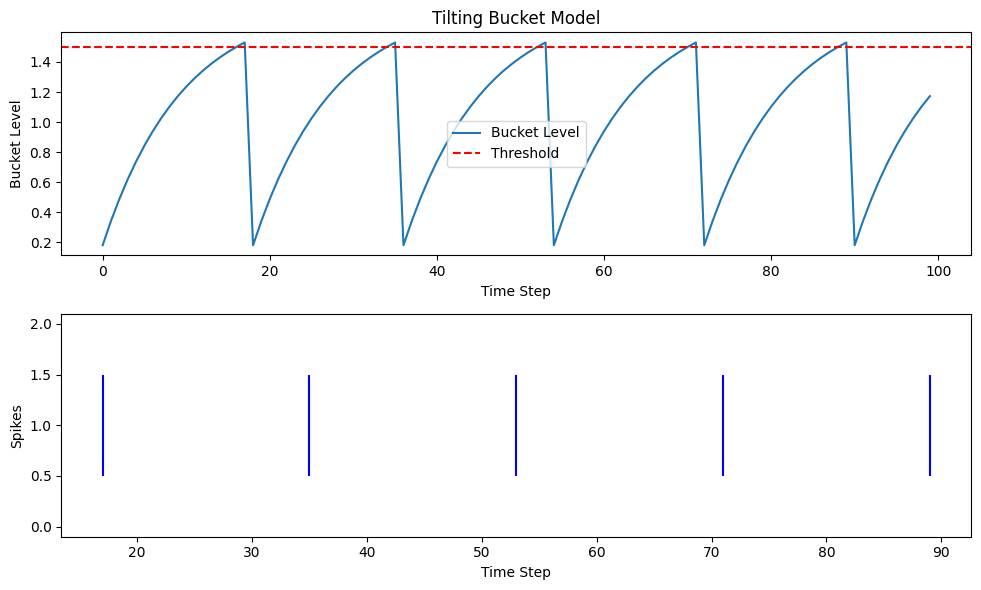

Input current: 0.2, Threshold: 1.5, Leak rate: 0.1


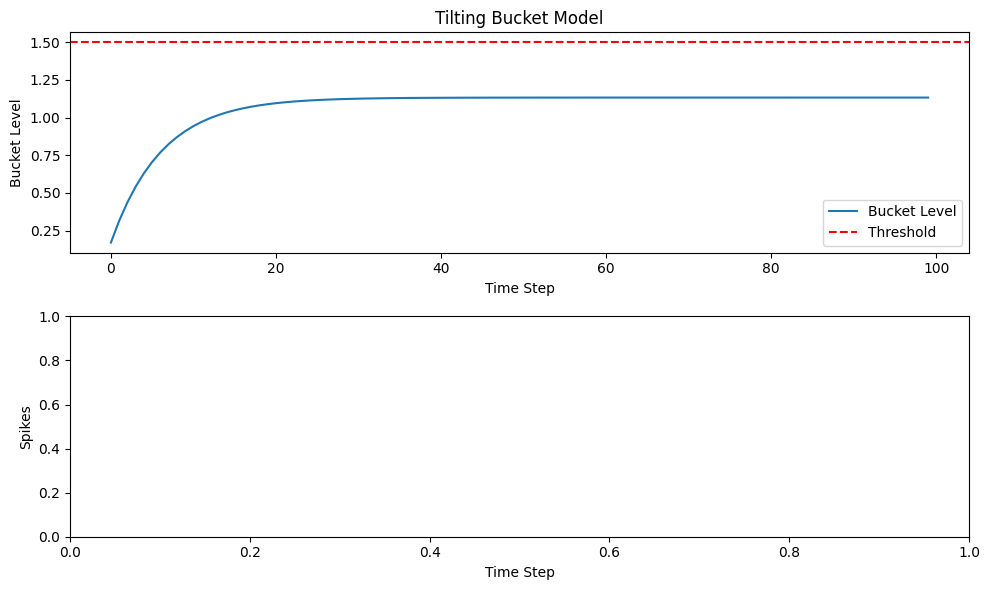

Input current: 0.2, Threshold: 1.5, Leak rate: 0.15


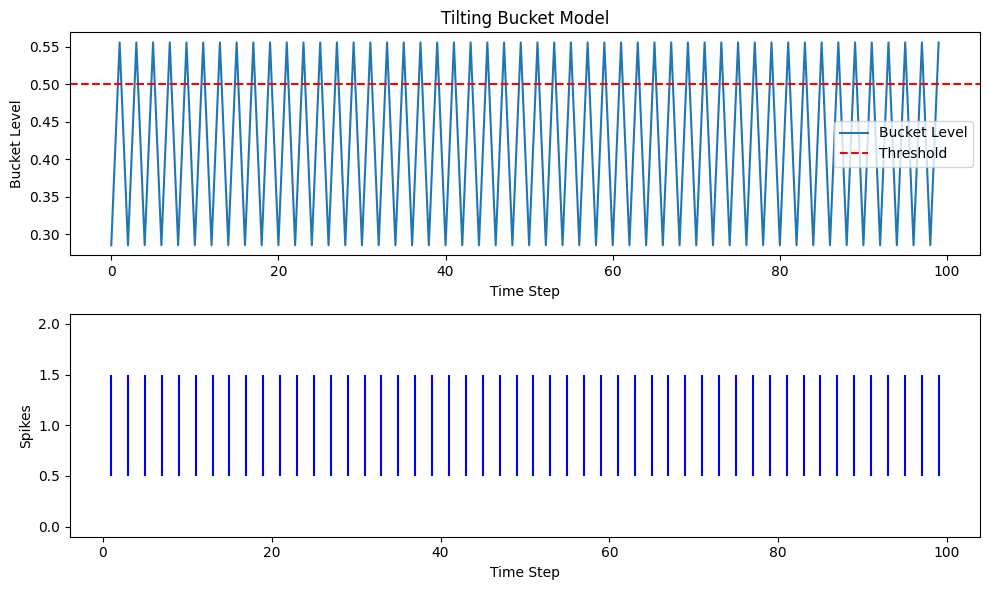

Input current: 0.3, Threshold: 0.5, Leak rate: 0.05


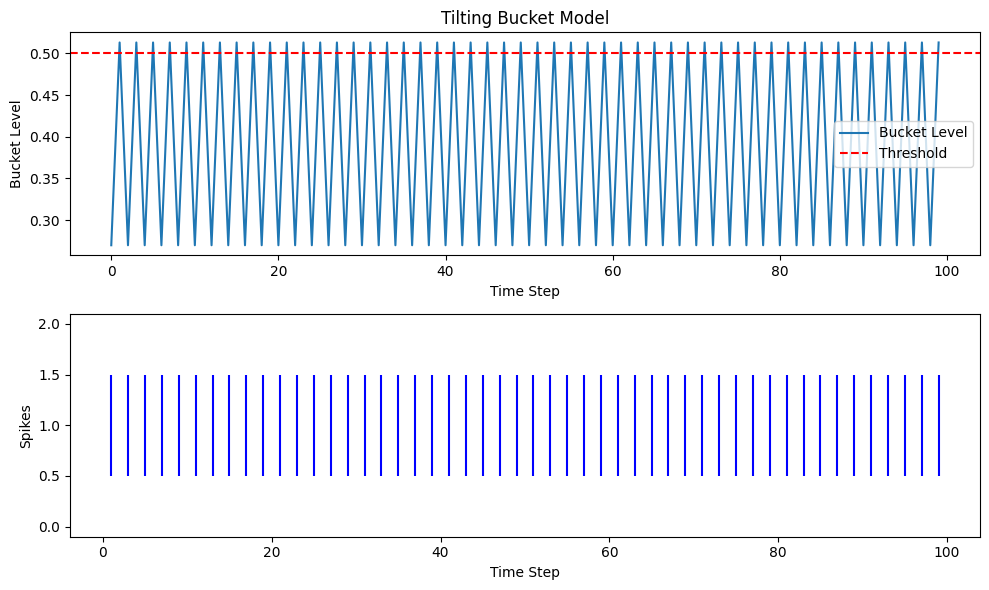

Input current: 0.3, Threshold: 0.5, Leak rate: 0.1


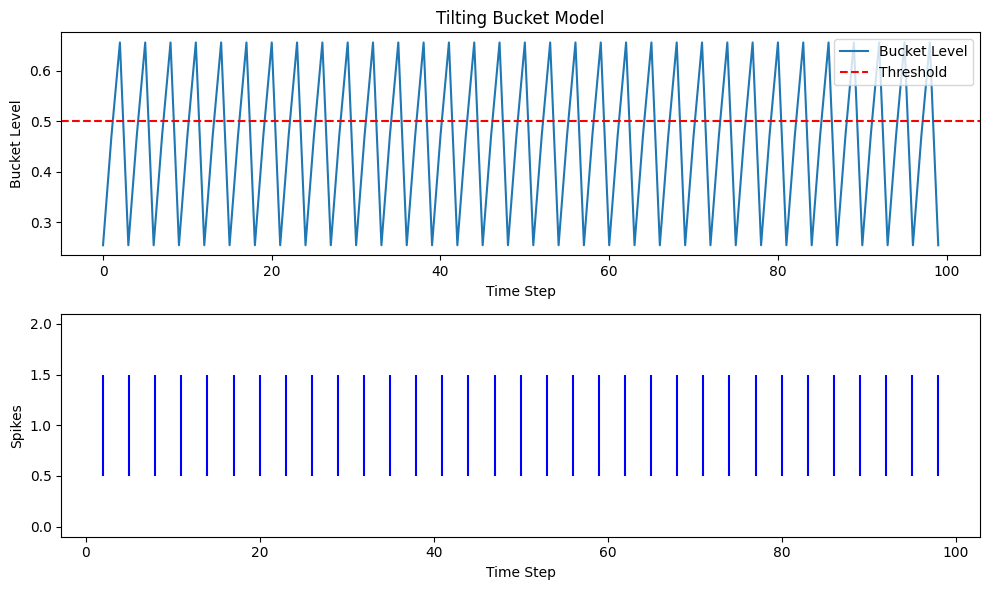

Input current: 0.3, Threshold: 0.5, Leak rate: 0.15


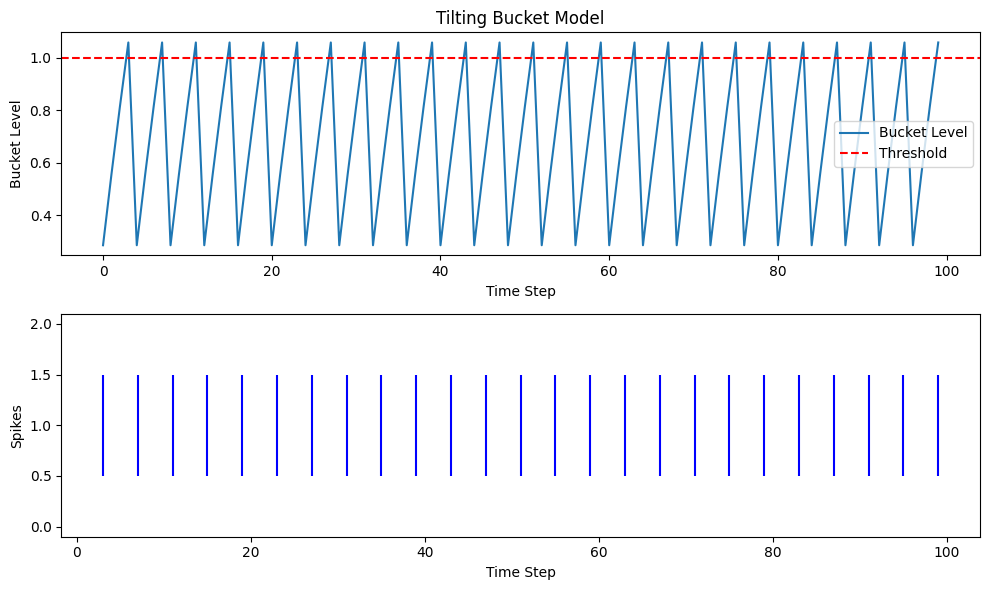

Input current: 0.3, Threshold: 1.0, Leak rate: 0.05


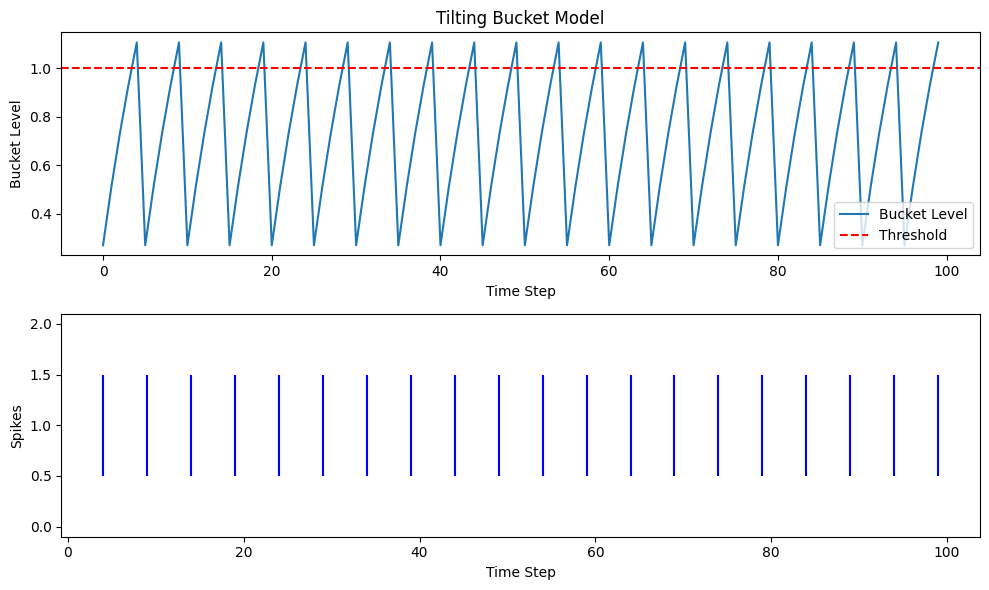

Input current: 0.3, Threshold: 1.0, Leak rate: 0.1


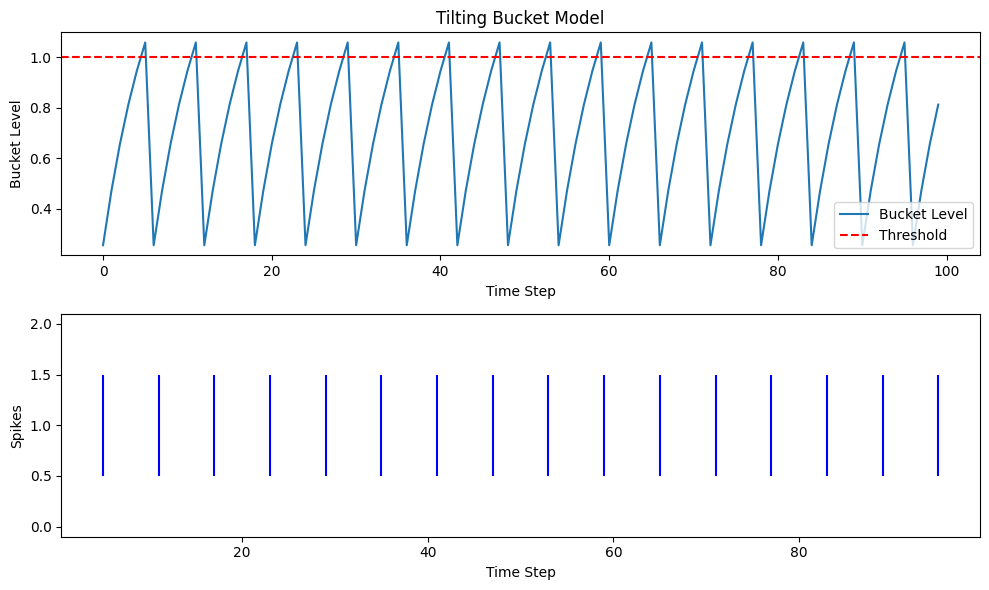

Input current: 0.3, Threshold: 1.0, Leak rate: 0.15


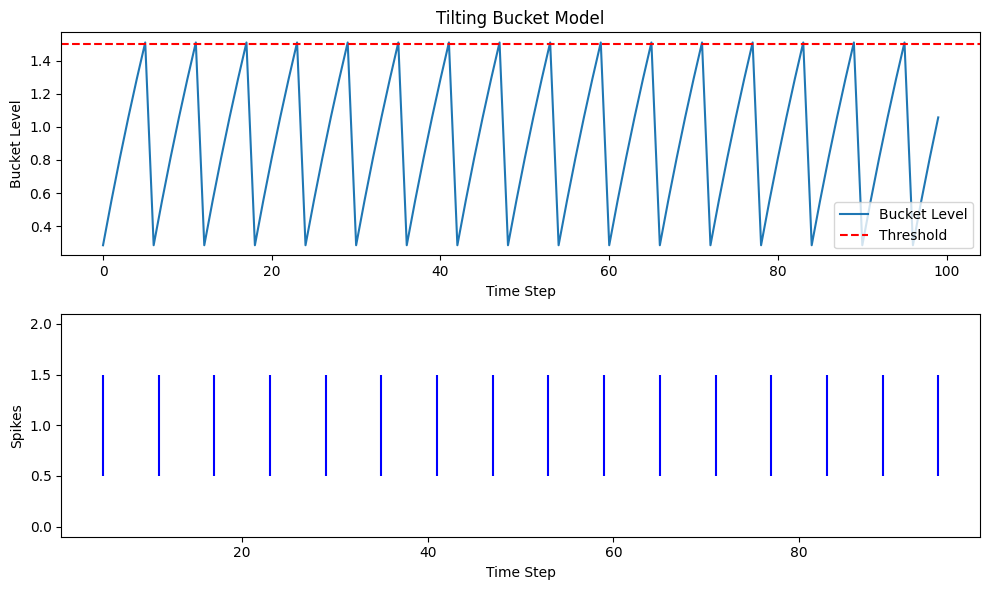

Input current: 0.3, Threshold: 1.5, Leak rate: 0.05


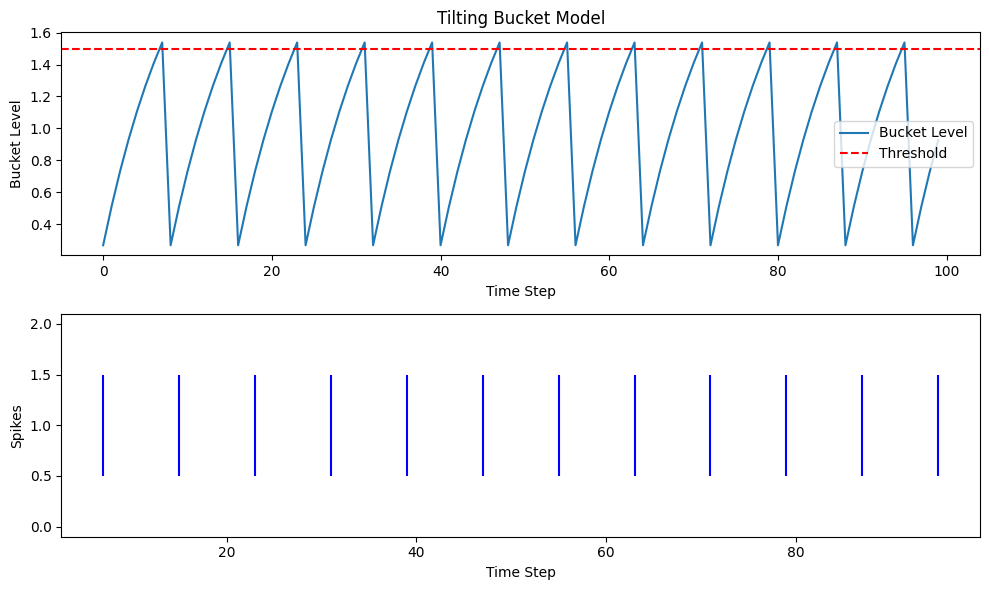

Input current: 0.3, Threshold: 1.5, Leak rate: 0.1


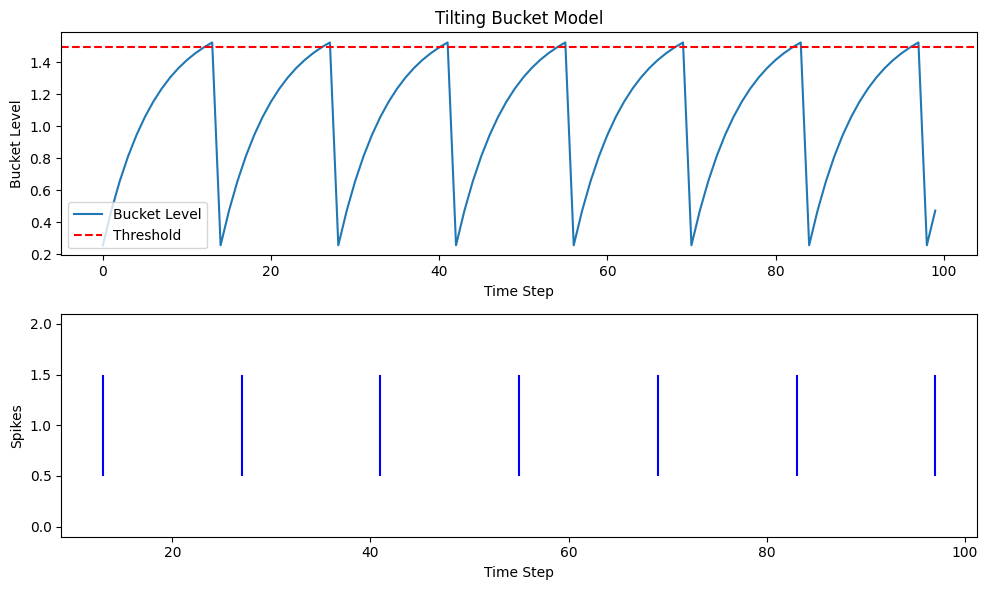

Input current: 0.3, Threshold: 1.5, Leak rate: 0.15


In [3]:
# Your code
for input_current in [0.1, 0.2, 0.3]:
    for threshold in [0.5, 1.0, 1.5]:
        for leak_rate in [0.05, 0.1, 0.15]:
            spikes, bucket_levels = tilting_bucket_model(threshold, leak_rate, input_current, time_steps)
            visualize_simulation(spikes, bucket_levels, threshold, time_steps)
            print(f"Input current: {input_current}, Threshold: {threshold}, Leak rate: {leak_rate}")



# 2. Stochastic Input:
Instead of a constant input current, simulate a fluctuating or noisy    input current (e.g., using a random number generator with normal distribution)  and observe how the neuron responds.
Try different distributions of noise and visualize the effect.


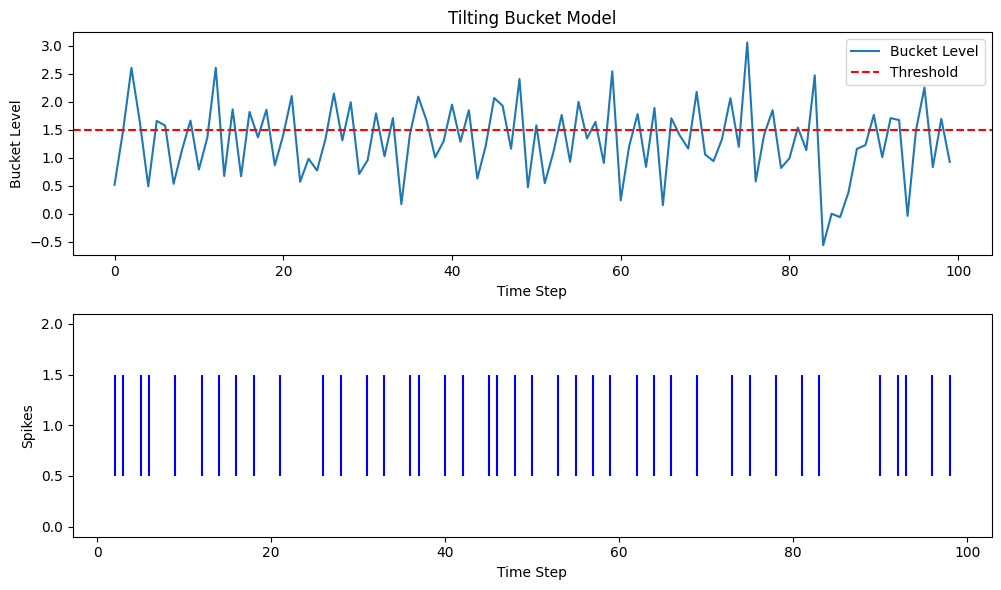

In [34]:
def tilting_bucket_model_stochastic(threshold, input_current, leak_rate, time_steps, noise_std):
    """Simulates the tilting bucket model with stochastic input."""

    bucket_level = 0.0
    spikes = []
    bucket_levels = []

    for t in range(time_steps):
        bucket_level += input_current[t]
        bucket_level -= leak_rate * bucket_level
        bucket_levels.append(bucket_level)

        if bucket_level >= threshold:
            spikes.append(t)
            bucket_level = 0.0




    return spikes, bucket_levels


noise_std = 0.1
time_steps = 100
input_current = np.random.normal(1, noise_std, time_steps)

spikes, bucket_levels = tilting_bucket_model_stochastic(threshold, input_current, leak_rate, time_steps, noise_std)
visualize_simulation(spikes, bucket_levels, threshold, time_steps)


# 3. Adaptation:

Modify the model to include adaptation:  the threshold increases slightly after a spike, mimicking neuronal refractoriness.

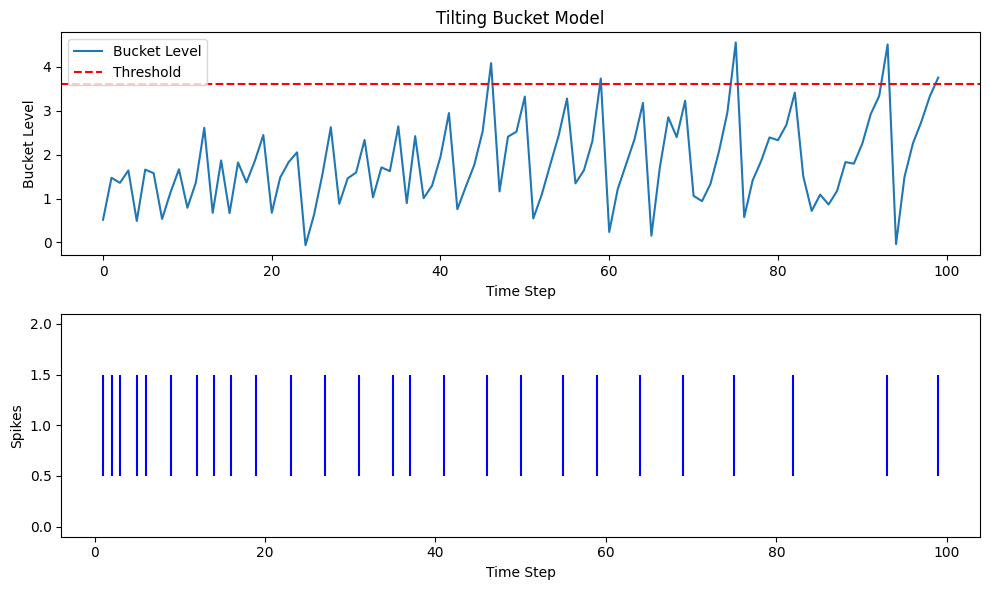

In [55]:
def tilting_bucket_model_adaptation(threshold, leak_rate, input_current, time_steps, adaptation_rate):
    """Simulates the tilting bucket model with neuronal adaptation."""

    bucket_level = 0.0
    spikes = []
    bucket_levels = []
    threshold_history = []

    for t in range(time_steps):
        bucket_level += input_current[t]
        bucket_level -= leak_rate * bucket_level
        bucket_levels.append(bucket_level)

        if bucket_level >= threshold:
            threshold = threshold + adaptation_rate
            spikes.append(t)
            bucket_level = 0.0
            threshold_history.append(threshold)

    return spikes, bucket_levels, max(threshold_history)

theshold = 1.0
adaptation_rate = 0.1
spikes, bucket_levels_adapted, current_threshold = tilting_bucket_model_adaptation(theshold, leak_rate, input_current, time_steps, adaptation_rate)
visualize_simulation(spikes, bucket_levels_adapted, current_threshold, time_steps)

## Perceptron

The perceptron is a fundamental building block of neural networks.  It's a simplified model of a biological neuron that takes multiple binary inputs, multiplies each by a weight, sums them up, and then applies an activation function to produce a single binary output.

**Key components of a perceptron:**

* **Inputs (x₁, x₂, ..., xₙ):**  These are the input signals to the perceptron, typically binary values (0 or 1).
* **Weights (w₁, w₂, ..., wₙ):** Each input has an associated weight representing its importance or influence on the output.  These weights are learned during the training process.
* **Bias (b):**  The bias acts as an offset, allowing the perceptron to activate even when all inputs are zero.  It's similar to the threshold in the tilting bucket model.  
* **Weighted sum (z):**  This is the sum of the products of inputs and their corresponding weights, plus the bias:  z = (w₁x₁ + w₂x₂ + ... + wₙxₙ) + b
* **Activation function (f(z)):** This function determines the perceptron's output based on the weighted sum.  A common activation function is the step function:
    * f(z) = 1 if z >= 0
    * f(z) = 0 otherwise


**Perceptron Learning Rule:**

The perceptron learning rule is an iterative algorithm used to adjust the weights and bias of a perceptron to correctly classify input data.  It works as follows:

1. **Initialization:** Initialize the weights and bias to small random values.

2. **Iteration:**  Repeat the following steps for each training example (input and its desired output):
    * Calculate the weighted sum (z).
    * Apply the activation function to get the output (ŷ).
    * Compare the predicted output (ŷ) with the desired output (y).
    * Update the weights and bias based on the error:
       * If the prediction is correct (ŷ = y), do nothing.
       * If the prediction is incorrect:
           * For each weight wᵢ:  wᵢ(new) = wᵢ(old) + η(y - ŷ)xᵢ
           * Bias update: b(new) = b(old) + η(y - ŷ)
           where η (learning rate) is a small positive constant that controls the step size of the weight adjustments.

3. **Convergence:** Repeat the iteration until the perceptron correctly classifies all training examples or a maximum number of iterations is reached.


The learning rule ensures that the weights are adjusted in the direction that reduces the classification error. The learning rate determines how quickly the weights converge to their optimal values.


In [56]:
import numpy as np
import matplotlib.pyplot as plt


# Generate linearly separable data (example) - without seed
X = np.random.randn(100, 2)  # Data without seed
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  # Linear decision boundary


# Implementation of the Perceptron class with the following methods:
#     * __init__: Initializes the weights (randomly) and bias.
#     * predict: Predicts the class label for a given input vector.
#     * train: Implements the perceptron learning rule to update weights and bias based on the training data.

class Perceptron:
    def __init__(self, input_size, learning_rate=0.5):
        self.weights = np.random.rand(input_size)
        self.bias = 0
        self.learning_rate = learning_rate

    def predict(self, x):
        z = np.dot(self.weights, x) + self.bias
        return 1 if z >= 0 else -1

    def train(self, X, y, epochs=100):
      for _ in range(epochs):
        for i in range(len(X)):
          prediction = self.predict(X[i])
          if prediction != y[i]:
              self.weights += self.learning_rate * y[i] * X[i]
              self.bias += self.learning_rate * y[i]


## Task 1: Training and Visualization


Create an instance of the Perceptron class.
 Train the perceptron on the generated data using the train method. Visualize the decision boundary before and after training.  Use the plot_decision_boundary function below.


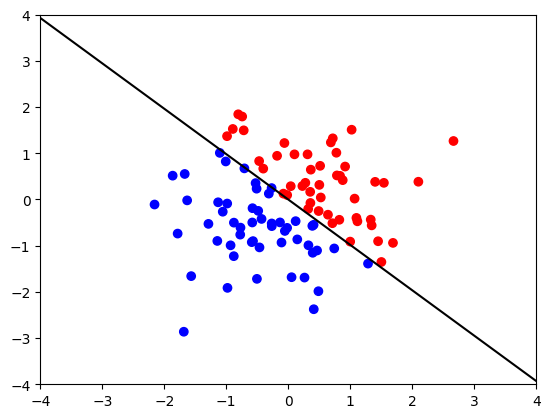

In [81]:
# Visualization function (provided)
def plot_decision_boundary(X, y, weights, bias):
    x1 = np.linspace(-4, 4, 100)
    x2 = -(weights[0] * x1 + bias) / weights[1]
    plt.plot(x1, x2, 'k-')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()


perceptron = Perceptron(input_size=2)
perceptron.train(X, y)
plot_decision_boundary(X, y, perceptron.weights, perceptron.bias)


In [84]:

print(perceptron.weights)

[2.05365503 2.14846827]



## Task 2: Experimentation

 1. Vary the learning rate and the number of training epochs.  Describe how these parameters affect the training process and the final decision boundary.

2. Generate a different dataset that is not linearly separable (e.g. using concentric circles).  What happens when you train the perceptron on this data?  Why?


In [83]:
x1 = np.linspace(-4, 4, 100)
print(x1)

[-4.         -3.91919192 -3.83838384 -3.75757576 -3.67676768 -3.5959596
 -3.51515152 -3.43434343 -3.35353535 -3.27272727 -3.19191919 -3.11111111
 -3.03030303 -2.94949495 -2.86868687 -2.78787879 -2.70707071 -2.62626263
 -2.54545455 -2.46464646 -2.38383838 -2.3030303  -2.22222222 -2.14141414
 -2.06060606 -1.97979798 -1.8989899  -1.81818182 -1.73737374 -1.65656566
 -1.57575758 -1.49494949 -1.41414141 -1.33333333 -1.25252525 -1.17171717
 -1.09090909 -1.01010101 -0.92929293 -0.84848485 -0.76767677 -0.68686869
 -0.60606061 -0.52525253 -0.44444444 -0.36363636 -0.28282828 -0.2020202
 -0.12121212 -0.04040404  0.04040404  0.12121212  0.2020202   0.28282828
  0.36363636  0.44444444  0.52525253  0.60606061  0.68686869  0.76767677
  0.84848485  0.92929293  1.01010101  1.09090909  1.17171717  1.25252525
  1.33333333  1.41414141  1.49494949  1.57575758  1.65656566  1.73737374
  1.81818182  1.8989899   1.97979798  2.06060606  2.14141414  2.22222222
  2.3030303   2.38383838  2.46464646  2.54545455  2.6

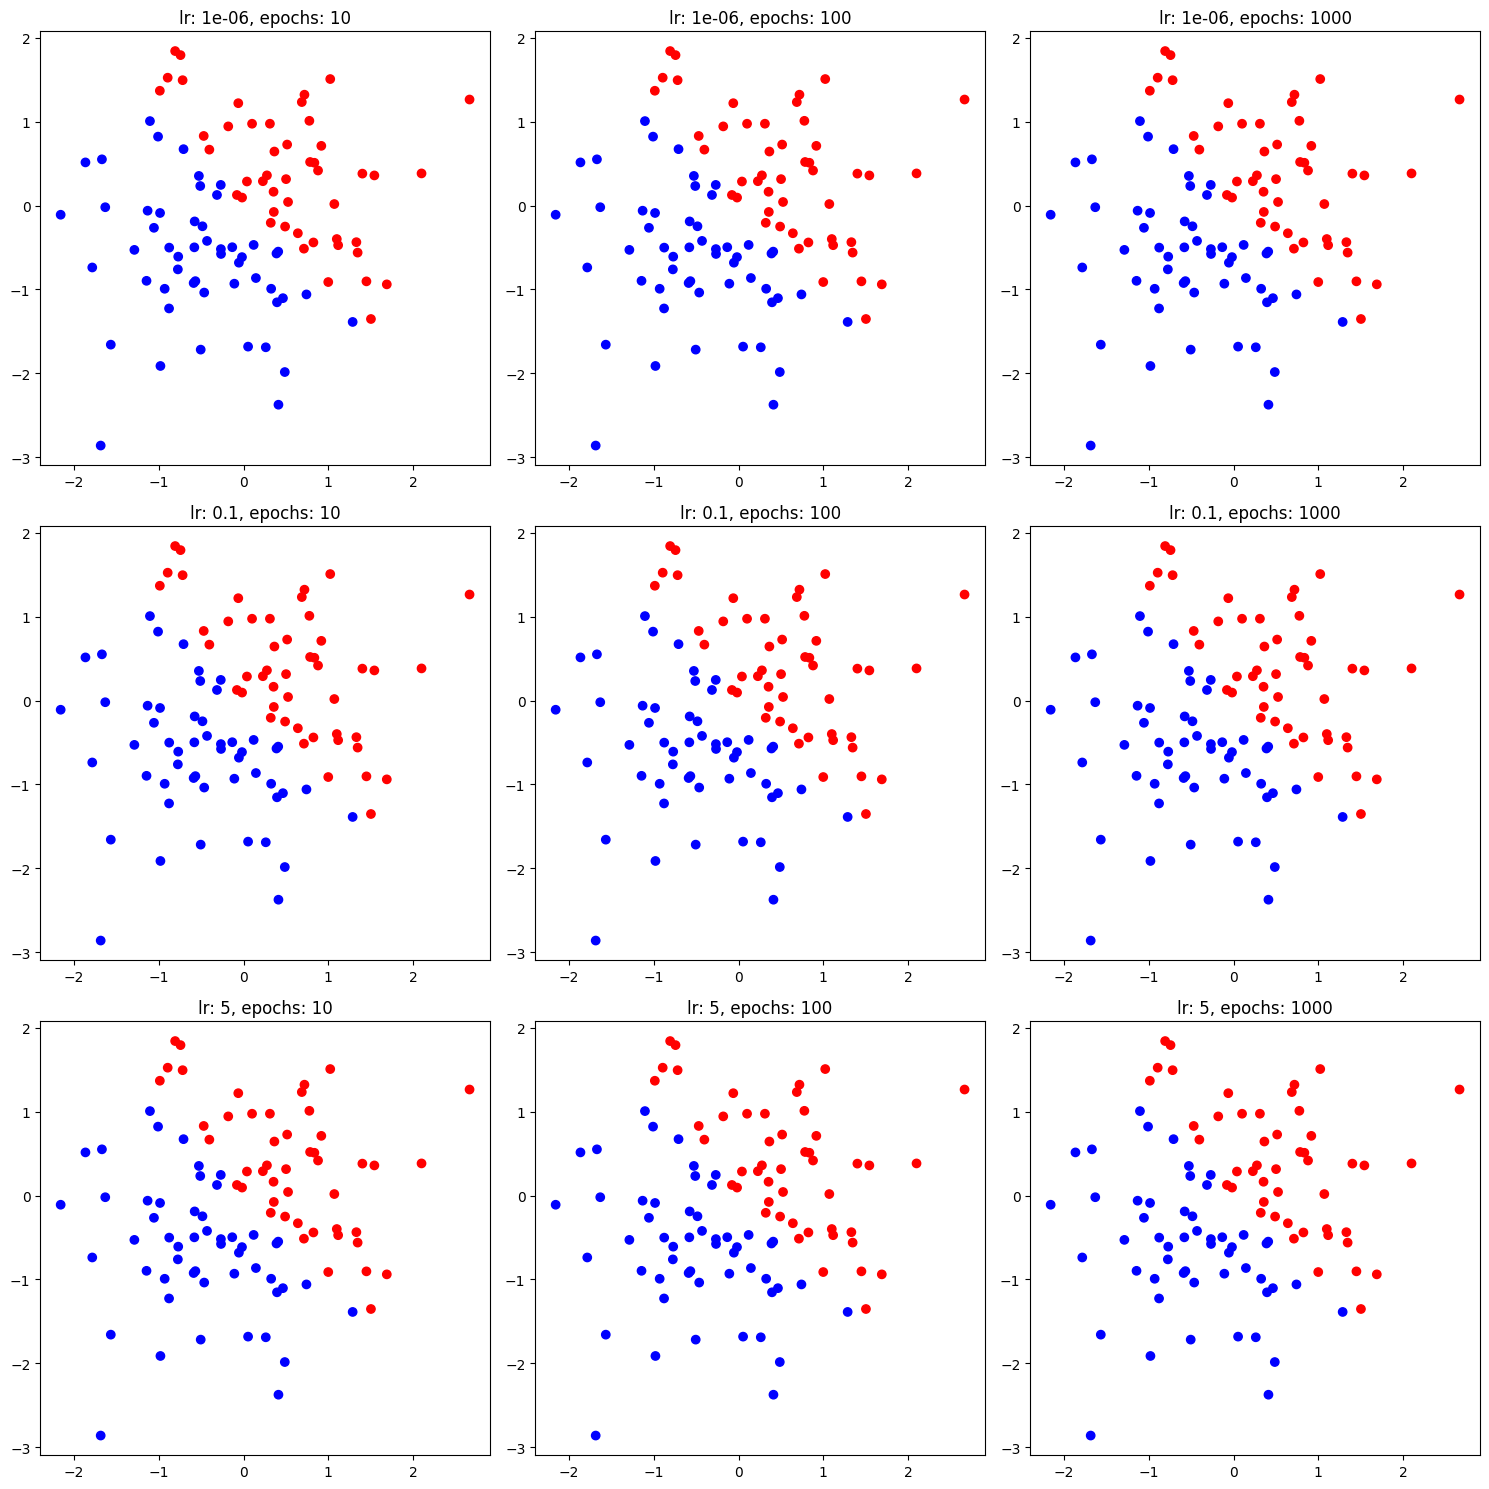

In [103]:
def plot_decision_boundary_3x3(X, y, weights, bias, ax, i, j, lable):

    x1 = np.linspace(-4, 4, 100)
    x2 = -(weights[0] * x1 + bias) / weights[1]
    # ax[i,j].plot(x1, x2, 'k-')
    ax[i,j].set_title(lable)
    ax[i,j].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')


# def plot_decision_boundary(X, y, weights, bias):
#     x1 = np.linspace(-4, 4, 100)
#     x2 = -(weights[0] * x1 + bias) / weights[1]
#     plt.plot(x1, x2, 'k-')
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
#     plt.xlim([-4, 4])
#     plt.ylim([-4, 4])
#     plt.show()


# Your code
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for index_i, learning_rate in enumerate([0.000001, 0.1, 5]):
    for index_j, epochs in enumerate([10, 100, 1000]):
        perceptron = Perceptron(input_size=2, learning_rate=learning_rate)
        perceptron.train(X, y, epochs=epochs)
        plot_decision_boundary_3x3(X, y, perceptron.weights, perceptron.bias, ax, index_i, index_j, f"lr: {learning_rate}, epochs: {epochs}")


plt.tight_layout()
plt.show()



*The first draft for this Notebook was generated with Gemini. We checked and adapted it afterwards.*